<a href="https://colab.research.google.com/github/somyayq/ML-Model-/blob/main/Salary_Deciding_Model(model_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries imported **

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# load the csv file
file_path="/content/expected_ctc.csv"
df=pd.read_csv(file_path)

In [ ]:
# describe first few rows and basic info
df.head() , df.info() , df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

(   IDX  Applicant_ID  Total_Experience  Total_Experience_in_field_applied  \
 0    1         22753                 0                                  0   
 1    2         51087                23                                 14   
 2    3         38413                21                                 12   
 3    4         11501                15                                  8   
 4    5         58941                10                                  5   
 
        Department               Role   Industry Organization      Designation  \
 0             NaN                NaN        NaN          NaN              NaN   
 1              HR         Consultant  Analytics            H               HR   
 2  Top Management         Consultant   Training            J              NaN   
 3         Banking  Financial Analyst   Aviation            F               HR   
 4           Sales    Project Manager  Insurance            E  Medical Officer   
 
    Education  ... Curent_Location P

In [ ]:
#basic info
print("Shape:",df.shape)
print("\nSample (first 10 rows):")
display(df.head(10))

Shape: (25000, 29)

Sample (first 10 rows):


,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,1,22753,0,0,NaN,NaN,NaN,NaN,NaN,PG,...,Guwahati,Pune,0,N,NaN,0,0,0,0,384551
1,2,51087,23,14,HR,Consultant,Analytics,H,HR,Doctorate,...,Bangalore,Nagpur,2702664,Y,Key_Performer,2,4,0,0,3783729
2,3,38413,21,12,Top Management,Consultant,Training,J,NaN,Doctorate,...,Ahmedabad,Jaipur,2236661,Y,Key_Performer,5,3,0,0,3131325
3,4,11501,15,8,Banking,Financial Analyst,Aviation,F,HR,Doctorate,...,Kanpur,Kolkata,2100510,N,C,5,3,0,0,2608833
4,5,58941,10,5,Sales,Project Manager,Insurance,E,Medical Officer,Grad,...,Ahmedabad,Ahmedabad,1931644,N,C,2,3,0,0,2221390
5,6,30564,16,3,Top Management,Area Sales Manager,Retail,G,Director,Doctorate,...,Pune,Bhubaneswar,3511167,Y,C,5,4,0,0,4522383
6,7,27267,1,1,Engineering,Team Lead,FMCG,L,Marketing Manager,Grad,...,Delhi,Pune,492917,Y,B,3,3,0,0,630933
7,8,36521,19,11,Others,Analyst,Others,E,Manager,PG,...,Surat,Bangalore,2693459,N,C,6,1,1,0,3221376
8,9,11616,8,7,Analytics/BI,Others,Telecom,L,Marketing Manager,Doctorate,...,Nagpur,Guwahati,1630225,N,A,6,6,0,0,2288835
9,10,43886,15,15,Analytics/BI,CEO,Telecom,M,Product Manager,Doctorate,...,Bangalore,Bhubaneswar,1761797,Y,A,5,6,0,1,2466515


In [ ]:
#Missin values summary (missinf_count & missing_percentage)
miss = df.isnull().sum()
miss_pct = (miss / len(df)) * 100
miss_df=pd.DataFrame({'missing_count': miss, 'missing_pct':miss_pct}).sort_values('missing_pct',ascending=False)
print("\nMissing Values Summary:")
display(miss_df)


Missing Values Summary:


,missing_count,missing_pct
PHD_Specialization,11881,47.524
University_PHD,11881,47.524
Passing_Year_Of_PHD,11881,47.524
PG_Specialization,7692,30.768
Passing_Year_Of_PG,7692,30.768
University_PG,7692,30.768
Graduation_Specialization,6180,24.720
Passing_Year_Of_Graduation,6180,24.720
University_Grad,6180,24.720
Designation,3129,12.516


In [ ]:
# Dtypes + unique counts  in this we are checking the uniqueness of our data
dtypes = pd.DataFrame(df.dtypes,columns=['dtype'])
dtypes['nunique'] = [df[col].nunique(dropna=True) if col in df.columns else 0 for col in dtypes.index]
print("\nColumn dtypes and unique counts:")
display(dtypes)


Column dtypes and unique counts:


,dtype,nunique
IDX,int64,25000
Applicant_ID,int64,19766
Total_Experience,int64,26
Total_Experience_in_field_applied,int64,26
Department,object,12
Role,object,24
Industry,object,11
Organization,object,16
Designation,object,18
Education,object,4


In [ ]:
#Top categories for categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
if cat_cols:
  top_cat_frames = []
  for col in cat_cols:
    vc = df[col].value_counts(dropna=False).head(10)
    tmp = pd.DataFrame({'column':col, 'value':vc.index.astype(str), 'count':vc.values})
    top_cat_frames.append(tmp)
  top_cat_df = pd.concat(top_cat_frames , ignore_index=True)
  print("\nTop categories (up to 10) per categorical column:")
  display(top_cat_df)
else:
  print("\nNo Categorical column detected.")


Top categories (up to 10) per categorical column:


,column,value,count
0,Department,nan,2778
1,Department,Marketing,2379
2,Department,Analytics/BI,2096
3,Department,Healthcare,2062
4,Department,Others,2041
...,...,...,...
137,Last_Appraisal_Rating,D,4917
138,Last_Appraisal_Rating,C,4812
139,Last_Appraisal_Rating,A,4671
140,Last_Appraisal_Rating,Key_Performer,4191


In [ ]:
#Numerical summary + skewness
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_desc = df[num_cols].describe().T
num_desc['skew'] = df[num_cols].skew()
print("\nNumerical summary (describe + skew):")
print(num_desc)


Numerical summary (describe + skew):
                                     count          mean           std  \
IDX                                25000.0  1.250050e+04  7.217023e+03   
Applicant_ID                       25000.0  3.499324e+04  1.439027e+04   
Total_Experience                   25000.0  1.249308e+01  7.471398e+00   
Total_Experience_in_field_applied  25000.0  6.258200e+00  5.819513e+00   
Passing_Year_Of_Graduation         18820.0  2.002194e+03  8.316640e+00   
Passing_Year_Of_PG                 17308.0  2.005154e+03  9.022963e+00   
Passing_Year_Of_PHD                13119.0  2.007396e+03  7.493601e+00   
Current_CTC                        25000.0  1.760945e+06  9.202125e+05   
No_Of_Companies_worked             25000.0  3.482040e+00  1.690335e+00   
Number_of_Publications             25000.0  4.089040e+00  2.606612e+00   
Certifications                     25000.0  7.736800e-01  1.199449e+00   
International_degree_any           25000.0  8.172000e-02  2.739431e-01   


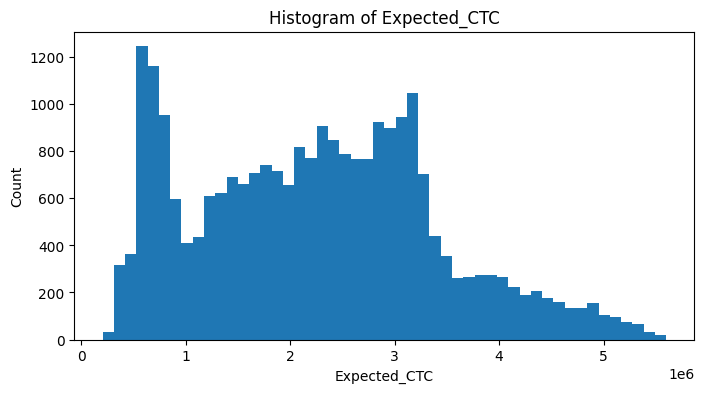

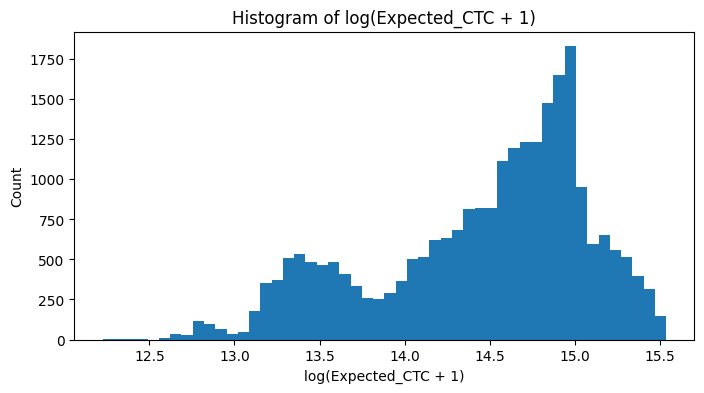

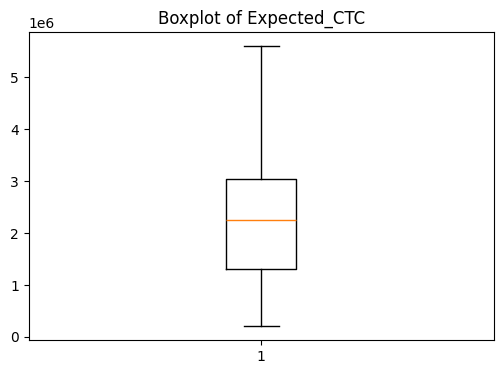

In [ ]:
# Target distribution visualization
target = 'Expected_CTC'
if target in df.columns:
  #histogram
  plt.figure(figsize=(8,4))
  plt.hist(df[target].dropna(),bins=50)
  plt.title('Histogram of Expected_CTC')
  plt.xlabel('Expected_CTC')
  plt.ylabel('Count')
  plt.show()

  print("\n")

  #log histogram
  plt.figure(figsize=(8,4))
  plt.hist(np.log1p(df[target].dropna()),bins=50)
  plt.title('Histogram of log(Expected_CTC + 1)')
  plt.xlabel('log(Expected_CTC + 1)')
  plt.ylabel('Count')
  plt.show()

  print("\n")

  #boxplot
  plt.figure(figsize=(6,4))
  plt.boxplot(df[target].dropna())
  plt.title('Boxplot of Expected_CTC')
  plt.show()
else:
  print("\nTarget column 'Expected_CTC' not found.")

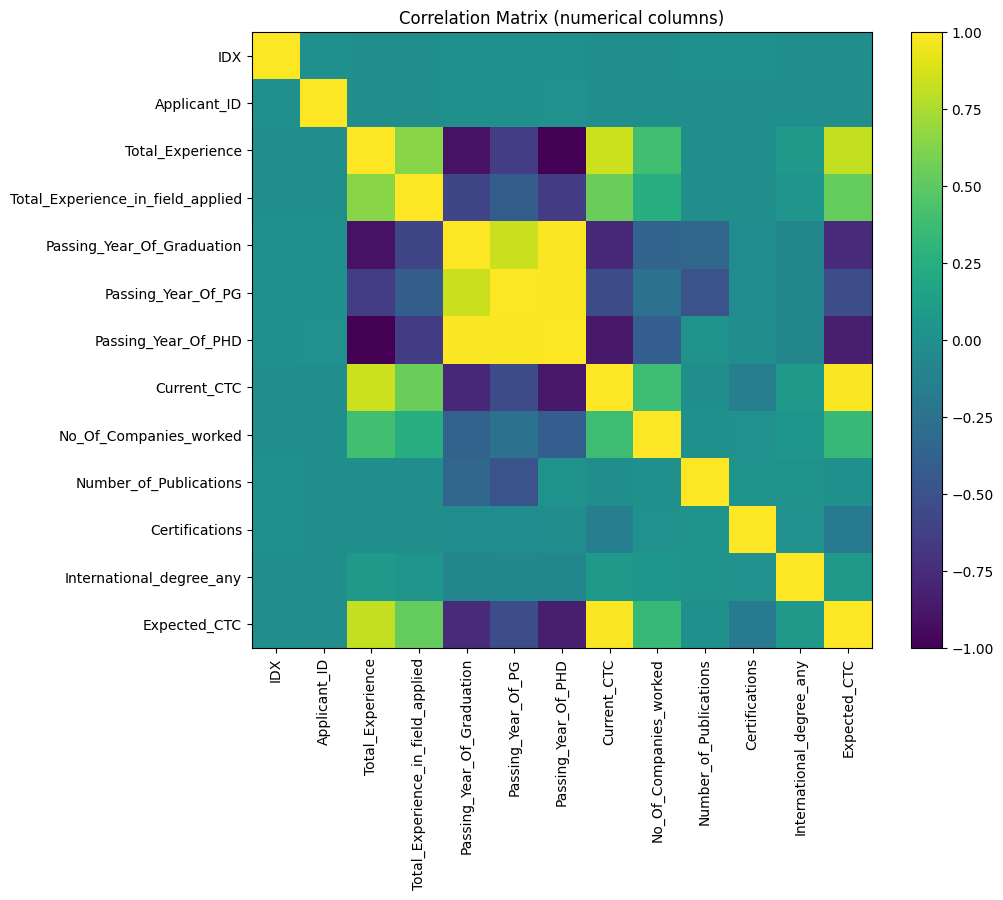


Correlation matrix (numeric):


,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
IDX,1.000,0.006,-0.006,-0.007,0.004,0.007,0.004,-0.007,-0.002,0.003,0.003,-0.002,-0.006
Applicant_ID,0.006,1.000,-0.008,-0.005,0.006,0.007,0.013,-0.012,-0.006,-0.007,-0.005,-0.002,-0.009
Total_Experience,-0.006,-0.008,1.000,0.645,-0.903,-0.635,-1.000,0.846,0.398,-0.000,-0.001,0.084,0.817
Total_Experience_in_field_applied,-0.007,-0.005,0.645,1.000,-0.581,-0.411,-0.648,0.548,0.249,-0.011,-0.003,0.043,0.529
Passing_Year_Of_Graduation,0.004,0.006,-0.903,-0.581,1.000,0.841,0.989,-0.778,-0.363,-0.336,-0.030,-0.086,-0.759
Passing_Year_Of_PG,0.007,0.007,-0.635,-0.411,0.841,1.000,0.989,-0.545,-0.255,-0.491,-0.026,-0.066,-0.531
Passing_Year_Of_PHD,0.004,0.013,-1.000,-0.648,0.989,0.989,1.000,-0.863,-0.403,0.016,-0.016,-0.084,-0.834
Current_CTC,-0.007,-0.012,0.846,0.548,-0.778,-0.545,-0.863,1.000,0.380,-0.006,-0.143,0.079,0.987
No_Of_Companies_worked,-0.002,-0.006,0.398,0.249,-0.363,-0.255,-0.403,0.380,1.000,0.001,0.013,0.047,0.343
Number_of_Publications,0.003,-0.007,-0.000,-0.011,-0.336,-0.491,0.016,-0.006,0.001,1.000,0.019,0.016,0.002


In [ ]:
# Correlation matrix (numerical) HEAT MAP
if len(num_cols) > 1:
  corr = df[num_cols].corr()
  plt.figure(figsize=(10,8))
  plt.imshow(corr,interpolation='nearest',aspect='auto')
  plt.colorbar()
  plt.xticks(range(len(num_cols)),num_cols,rotation=90)
  plt.yticks(range(len(num_cols)),num_cols)
  plt.title('Correlation Matrix (numerical columns)')
  plt.show()
  print("\nCorrelation matrix (numeric):")
  display(corr.round(3))
else:
  print("\nNot enought numeric columns to comput correlation.")

In [ ]:
#outlier summary using IQR for selected numerical columns
outlier_info = []
selected_cols = ['Expected_CTC','Current_CTC','Total_Experience','Total_Experience_in_field_applied']
for col in selected_cols:
  if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    n_low = int((df[col] < lower).sum())
    n_high = int((df[col] > upper).sum())
    outlier_info.append({
        'column':col,
        'q1':q1,
        'q3':q3,
        'iqr':iqr,
        'lower_bound':lower,
        'upper_bound':upper,
        'n_low':n_low,
        'n_high':n_high
    })
outlier_df = pd.DataFrame(outlier_info)
print("\nOutlier summary (IQR method) for selected numerical columns:")
display(outlier_df)


Outlier summary (IQR method) for selected numerical columns:


,column,q1,q3,iqr,lower_bound,upper_bound,n_low,n_high
0,Expected_CTC,1306277.5,3051353.75,1745076.25,-1311336.875,5668968.125,0,0
1,Current_CTC,1027311.5,2443883.25,1416571.75,-1097546.125,4568740.875,0,0
2,Total_Experience,6.0,19.00,13.00,-13.500,38.500,0,0
3,Total_Experience_in_field_applied,1.0,10.00,9.00,-12.500,23.500,0,119


In [ ]:
df.Curent_Location.info()

<class 'pandas.core.series.Series'>
RangeIndex: 25000 entries, 0 to 24999
Series name: Curent_Location
Non-Null Count  Dtype 
--------------  ----- 
25000 non-null  object
dtypes: object(1)
memory usage: 195.4+ KB


In [ ]:
if target in df.columns:
# Top 10 rows by Expected_CTC
  print("\nTop 10 rows by Expected_CTC:")
  display(df.sort_values(target,ascending=False).head(10))



Top 10 rows by Expected_CTC:


,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
22379,22380,27518,17,10,Healthcare,Financial Analyst,IT,A,Marketing Manager,Doctorate,...,Pune,Jaipur,3999693,Y,Key_Performer,2,5,0,0,5599570
12340,12341,48670,24,18,Sales,Sales Execituve,Automobile,O,Software Developer,Doctorate,...,Guwahati,Nagpur,3990033,Y,Key_Performer,6,7,0,0,5586046
15941,15942,42561,21,8,Sales,Project Manager,FMCG,A,NaN,Doctorate,...,Kolkata,Kanpur,3988003,Y,Key_Performer,6,7,0,0,5583204
20015,20016,14574,24,5,IT-Software,Head,Retail,L,Product Manager,Doctorate,...,Mumbai,Pune,3981924,Y,Key_Performer,3,4,0,1,5574693
4233,4234,54969,23,8,Marketing,Scientist,BFSI,A,Network Engineer,Doctorate,...,Pune,Jaipur,3979221,Y,B,3,8,0,1,5570909
1098,1099,50119,16,9,Analytics/BI,Project Manager,Aviation,E,Network Engineer,Doctorate,...,Ahmedabad,Mumbai,3977531,Y,Key_Performer,2,4,0,0,5568543
19677,19678,33507,17,16,Healthcare,Sales Manager,Insurance,I,Data Analyst,Doctorate,...,Jaipur,Guwahati,3971196,Y,Key_Performer,5,4,0,0,5559674
3988,3989,14637,22,17,HR,Others,IT,C,Manager,Doctorate,...,Mangalore,Nagpur,3964785,Y,A,3,2,0,0,5550699
17247,17248,29837,23,12,IT-Software,Project Manager,FMCG,G,Product Manager,Doctorate,...,Mumbai,Ahmedabad,3964060,Y,A,3,4,0,0,5549684
10393,10394,52565,22,6,Marketing,Business Analyst,Others,K,Director,Doctorate,...,Bhubaneswar,Bangalore,3963054,Y,Key_Performer,3,4,0,0,5548275


In [ ]:
# This cell was used to save a small sample for quick checks.
# We will now use the full dataset, so this cell is no longer needed.
import os
os.makedirs('/mnt/data', exist_ok=True) # Create the directory if it doesn't exist
df.sample(10).to_csv('/mnt/data/expected_ctc_sample.csv', index=False)
print("\nSaved a 10-row sample to /mnt/data/expected_ctc_sample.csv for quick checks.")


Saved a 10-row sample to /mnt/data/expected_ctc_sample.csv for quick checks.


# Now in this step we need to do the Cleaning & imputeing of the data

In [ ]:
# drop duplicates
df = df.drop_duplicates().reset_index(drop=True)
# df = df.drop(columns=['IDX'])  # keep Applicant_ID as want to join it further

In [ ]:
#convert dtypes
num_cols = ['Current_CTC','Expected_CTC','Total_Experience']
df[num_cols]=df[num_cols].apply(pd.to_numeric,errors='coerce')

In [ ]:
# fill categorical missing
cat_cols=df.select_dtypes(include='object').columns.tolist()
df[cat_cols]=df[cat_cols].fillna('Missing')

In [ ]:
# median numeric inpute
for c in num_cols:
  df[c]=df[c].fillna(df[c].median())

### **Feature engineering**

Reducing skew is important because it improves data reliability, machine learning model performance, and system efficiency by producing less biased models, more accurate predictions, balanced data distribution, and preventing performance bottlenecks and failures in various applications like financial forecasting and big data processing

1. Log target you plan to reduce skew


In [ ]:
df['log_Expected_CTC'] = np.log1p(df['Expected_CTC'])

2. Salary growth

In [ ]:
df['salary_diff'] = df['Expected_CTC'] - df['Current_CTC']
df['salary_pct_change'] = df['salary_diff'] / (df['Current_CTC'] + 1e-9)

3. Experience-based features:

In [ ]:
df['exp_mismatch'] = df['Total_Experience'] - df['Total_Experience_in_field_applied']
df['exp_ratio'] = df['Total_Experience_in_field_applied'] / (df['Total_Experience'] + 1e-9)

4. Group rare categories

In [ ]:
value_counts = df['Organization'].value_counts()
rare = value_counts[value_counts < 50].index
df['Organization_grp'] = df['Organization'].replace(rare, 'Other')

5. Education level mapping (original):

In [ ]:
edu_map = {'High School':0, 'Bachelors':1, 'Masters':2, 'PhD':3}  # adapt to your labels
df['edu_level'] = df['Education'].map(edu_map).fillna(0)

# **Training & Evaluation **

**importing the libraries**

In [ ]:
# Step 0: imports & config
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Libraries for Numerical & Data Handling
import numpy as np
import pandas as pd

# Model Selction & Evalution
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV

#Pipline & Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler

#Model
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

#Metics to evalute the model the following data
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Utilities used
import joblib
import math
import time

# Sets a fixed seed for reproducibility of random opertions
RND = 42
np.random.seed(RND)

**Load data & guick checks**

In [ ]:
# Step 4: Load data & quick checks
# We are now using the full dataset loaded earlier, so we don't need to load the sample here.
file_path='/mnt/data/expected_ctc_sample.csv'   # comment this to load this dataset
df=pd.read_csv(file_path)   # and this file
print("Shape:",df.shape)
display(df.head(10))

# quickly summarize this csv file
display(df.isna().sum().sort_values(ascending=False).head(20))

Shape: (10, 29)


,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Department,Role,Industry,Organization,Designation,Education,...,Curent_Location,Preferred_location,Current_CTC,Inhand_Offer,Last_Appraisal_Rating,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
0,20731,54842,5,3,Others,Sales Execituve,BFSI,A,Manager,Under Grad,...,Lucknow,Mangalore,446237,Y,D,6,3,2,0,533699
1,16535,47675,4,2,NaN,Team Lead,IT,L,NaN,Grad,...,Chennai,Bangalore,692573,N,B,6,4,0,0,865716
2,24323,24819,22,8,Banking,Team Lead,Others,L,Sr.Manager,Grad,...,Ahmedabad,Kanpur,2680173,Y,B,6,3,0,0,3430621
3,1367,55541,8,8,Banking,Senior Researcher,Others,H,Product Manager,Under Grad,...,Bangalore,Mangalore,1026743,N,C,4,6,5,0,1180754
4,9398,49368,15,13,Engineering,Business Analyst,Telecom,O,Consultant,Under Grad,...,Lucknow,Lucknow,1683963,N,C,2,8,3,0,1936557
5,14485,55454,7,1,Marketing,Scientist,Automobile,F,HR,Grad,...,Jaipur,Lucknow,927369,Y,Key_Performer,2,3,0,0,1234513
6,14505,25675,18,8,Top Management,Others,Analytics,F,Marketing Manager,Under Grad,...,Bhubaneswar,Mangalore,2362638,N,B,2,0,3,0,2953297
7,20678,58894,14,14,HR,Financial Analyst,Telecom,B,Consultant,PG,...,Mangalore,Ahmedabad,1427366,Y,D,3,4,1,0,1733393
8,15779,15034,7,0,Others,Others,Others,G,Medical Officer,PG,...,Kanpur,Nagpur,948495,N,C,1,4,1,0,1134400
9,14270,48824,21,5,Education,Analyst,Aviation,N,Consultant,PG,...,Bhubaneswar,Mumbai,1745503,N,C,2,1,0,0,2087621


,0
PHD_Specialization,5
University_PHD,5
Passing_Year_Of_PHD,5
Passing_Year_Of_Graduation,4
University_Grad,4
PG_Specialization,4
Graduation_Specialization,4
University_PG,4
Passing_Year_Of_PG,4
Designation,1


**Define Taegets & drop identifiers**

In [ ]:
#we have defined the target
TARGET='Expected_CTC'

# we need to IDX if present , keep Application_ID only if needed
drop_cols=[c for c in['IDX'] if c in df.columns]
df=df.drop(columns=drop_cols)

#optional: if Applicant_ID isn't needed:
# df = df.drop(columns=['Application_ID'])

#ensure target exists
assert TARGET in df.columns, f"{TARGET} not found"

**Train/ Test split (do BEFORE encoding/ imputation maps)**

In [ ]:
X = df.drop(columns=[TARGET])
y = df[TARGET].copy()

# Use a larger test size for meaningful evaluation
X_train, X_test, y_train, y_test=train_test_split(
    X,y,test_size=0.2,random_state=RND
)

print("train:", X_train.shape,"test:",X_test.shape)

train: (8, 27) test: (2, 27)


Identify numeric and categorical columns & decide high-cardinality

In [ ]:
# Step 4: auto-detect column types
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# decide threshold for high-cardinality (unique > threshold)
HIGH_CARD_UNIQUE = 30   # adjustable
low_card_cat = [c for c in cat_cols if X_train[c].nunique() <= HIGH_CARD_UNIQUE]
high_card_cat = [c for c in cat_cols if X_train[c].nunique() > HIGH_CARD_UNIQUE]

print("numeric cols:", len(num_cols))
print("low-card categorical cols:", len(low_card_cat))
print("high-card categorical cols:", len(high_card_cat))


numeric cols: 11
low-card categorical cols: 16
high-card categorical cols: 0


Frequency encoding for high-cardinality cats (fit on train, apply to both)

In [ ]:
# Step 5: frequency encoding for high-cardinality categorical cols
def fit_frequency_encoding(df, cols):
    freq_maps = {}
    for c in cols:
        vc = df[c].value_counts(normalize=True)  # use proportions
        freq_maps[c] = vc.to_dict()
    return freq_maps

def apply_frequency_encoding(df, freq_maps, cols):
    df_ = df.copy()
    for c in cols:
        mapping = freq_maps.get(c, {})
        # map unknown -> 0
        df_[c] = df_[c].map(mapping).fillna(0)
    return df_

# Fit maps on X_train
freq_maps = fit_frequency_encoding(X_train, high_card_cat)

# Apply to both sets
X_train_fe = apply_frequency_encoding(X_train, freq_maps, high_card_cat)
X_test_fe = apply_frequency_encoding(X_test, freq_maps, high_card_cat)

# After frequency-encoding, those high_card_cat columns are numeric -> include them in numeric pipeline
num_cols_extended = num_cols + high_card_cat
# remove high_card_cat from categorical list for OneHot
low_card_cat = [c for c in low_card_cat if c not in high_card_cat]

print("Final numeric columns for pipeline:", len(num_cols_extended))
print("Remaining low-card categorical for one-hot:", len(low_card_cat))


Final numeric columns for pipeline: 11
Remaining low-card categorical for one-hot: 16


Build preprocessing pipelines

In [ ]:
# Step 6: Preprocessing
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols_extended),
        ('cat', categorical_transformer, low_card_cat),
    ],
    remainder='drop'  # everything else is dropped
)


**Helper:function to evaluate a fitted model on test set**

In [ ]:
def evaluate_model(pipeline, X_tr, y_tr, X_te, y_te, log_target=False):
    # If using cross_val, use it before calling fit here. This function assumes model is already fit or will be fit here.
    start = time.time()
    pipeline.fit(X_tr, y_tr)
    fit_time = time.time() - start

    preds = pipeline.predict(X_te)
    # If model trained on log1p target, user should pass log_target=True and y_tr will need to be log1p earlier.
    if log_target:
        # preds are log1p predictions; convert
        preds = np.expm1(preds)
        y_true = y_te
    else:
        y_true = y_te

    mae = mean_absolute_error(y_true, preds)
    rmse = math.sqrt(mean_squared_error(y_true, preds))
    r2 = r2_score(y_true, preds)
    return {'mae': mae, 'rmse': rmse, 'r2': r2, 'fit_time_sec': fit_time}


Baseline: Linear Regression (plus Ridge) via pipeline + CV

In [ ]:
# Step 8: Baseline linear models (without log transform)
from sklearn.model_selection import cross_validate

lin_pipe = Pipeline([
    ('preproc', preprocessor),
    ('model', LinearRegression())
])

ridge_pipe = Pipeline([
    ('preproc', preprocessor),
    ('model', Ridge(random_state=RND))
])

scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

def cv_report(pipe, X, y, cv=10):
    res = cross_validate(pipe, X, y, cv=cv, scoring=scoring, n_jobs=-1, return_train_score=False)
    rmse = np.sqrt(-res['test_neg_mean_squared_error']).mean()
    mae = -res['test_neg_mean_absolute_error'].mean()
    r2 = res['test_r2'].mean()
    return {'cv_rmse': rmse, 'cv_mae': mae, 'cv_r2': r2}

print("LinearRegression CV results:", cv_report(lin_pipe, X_train_fe, y_train, cv=8))
print("Ridge CV results:", cv_report(ridge_pipe, X_train_fe, y_train, cv=8))


LinearRegression CV results: {'cv_rmse': np.float64(1282984.8032984864), 'cv_mae': np.float64(1282984.8032984864), 'cv_r2': np.float64(nan)}
Ridge CV results: {'cv_rmse': np.float64(1293063.6372297578), 'cv_mae': np.float64(1293063.6372297578), 'cv_r2': np.float64(nan)}


**Tree models: RandomForest and XGBoost (if available)**

In [ ]:
# Step 9: RandomForest
rf_pipe = Pipeline([
    ('preproc', preprocessor),
    ('model', RandomForestRegressor(n_estimators=140, random_state=RND, n_jobs=-1))
])

print("RandomForest CV (5-fold):", cv_report(rf_pipe, X_train_fe, y_train, cv=5))

#try XGBoost if installed, else skip
try:
    import xgboost as xgb
    xgb_pipe = Pipeline([
        ('preproc', preprocessor),
        ('model', xgb.XGBRegressor(n_estimators=200, random_state=RND, n_jobs=-1, verbosity=0))
    ])
    print("XGBoost CV (5-fold):", cv_report(xgb_pipe, X_train_fe, y_train, cv=5))
except Exception as e:
    print("XGBoost not available or import failed:", e)

RandomForest CV (5-fold): {'cv_rmse': np.float64(1245905.152738281), 'cv_mae': np.float64(1121643.6171428573), 'cv_r2': np.float64(nan)}
XGBoost CV (5-fold): {'cv_rmse': np.float64(1207142.6515889778), 'cv_mae': np.float64(1099352.96875), 'cv_r2': np.float64(nan)}


**Fit best model on train and evaluate on test**

In [ ]:
# Step 10: pick model (example: choose rf_pipe if it had best CV)
best_pipe = rf_pipe  # change to ridge_pipe or xgb_pipe depending on CV results

res = evaluate_model(best_pipe, X_train_fe, y_train, X_test_fe, y_test, log_target=False)
print("Test set evaluation (chosen model):", res)


Test set evaluation (chosen model): {'mae': 470384.2428571428, 'rmse': 470558.8738044476, 'r2': -5.013976487968131, 'fit_time_sec': 0.36511993408203125}


**Feature importance (for tree models)**

In [ ]:
# Step 11: feature importance for RandomForest (if used)
if isinstance(best_pipe.named_steps['model'], RandomForestRegressor):
    # we need feature names from preprocessor
    preproc = best_pipe.named_steps['preproc']
    # get feature names (sklearn >=1.0 has get_feature_names_out)
    try:
        feat_names = preproc.get_feature_names_out()
    except:
        # fallback: build names manually
        # numeric names:
        feat_names = list(num_cols_extended)
        # onehot names
        if low_card_cat:
            ohe = preproc.named_transformers_['cat'].named_steps['onehot']
            ohe_cols = ohe.get_feature_names_out(low_card_cat)
            feat_names = feat_names + list(ohe_cols)
    importances = best_pipe.named_steps['model'].feature_importances_
    fi = pd.DataFrame({'feature': feat_names, 'importance': importances}).sort_values('importance', ascending=False).head(40)
    display(fi)
else:
    print("Model is not a tree-based regressor; skip feature_importances.")

,feature,importance
6,num__Current_CTC,0.276889
1,num__Total_Experience,0.237558
7,num__No_Of_Companies_worked,0.057212
15,cat__Department_Sales,0.030379
8,num__Number_of_Publications,0.024236
81,cat__Curent_Location_Guwahati,0.022725
43,cat__Education_Doctorate,0.020357
21,cat__Role_Senior Researcher,0.018096
38,cat__Designation_Missing,0.016541
97,cat__Last_Appraisal_Rating_C,0.016537


**Quick RandomizedSearch for RandomForest**

In [ ]:
# Step 12: optional hyperparameter tuning for RandomForest
param_dist = {
    'model__n_estimators': [100, 200, 400],
    'model__max_depth': [None, 10, 25, 50],
    'model__max_features': ['sqrt', 0.3, 0.5],
    'model__min_samples_split': [2, 5, 10],
}
rs = RandomizedSearchCV(rf_pipe, param_distributions=param_dist, n_iter=12, cv=3,
                        scoring='neg_mean_squared_error', n_jobs=-1, random_state=RND, verbose=1)
rs.fit(X_train_fe, y_train)
print("Best params:", rs.best_params_)
best_rf = rs.best_estimator_
print("Tuned RF test eval:", evaluate_model(best_rf, X_train_fe, y_train, X_test_fe, y_test))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best params: {'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__max_features': 0.5, 'model__max_depth': 10}
Tuned RF test eval: {'mae': 687772.9850000001, 'rmse': 706599.3883274662, 'r2': -12.56064368199072, 'fit_time_sec': 0.18489575386047363}


**Save your final pipeline**

In [ ]:
# Step 13: save final pipeline to disk
out_path = '/mnt/data/final_salary_model.joblib'
joblib.dump(best_pipe, out_path)
print("Saved pipeline to:", out_path)

Saved pipeline to: /mnt/data/final_salary_model.joblib


## **Validattion, deployment and improvement**

Begins here

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def metrics(y_true, y_pred):
    return {
      'mae': mean_absolute_error(y_true, y_pred),
      'rmse': np.sqrt(mean_squared_error(y_true, y_pred)),
      'r2': r2_score(y_true, y_pred)
    }

# assume best_pipe is your final pipeline and you have X_train, y_train, X_test, y_test
best_pipe.fit(X_train, y_train)
train_pred = best_pipe.predict(X_train)
test_pred  = best_pipe.predict(X_test)

print("train:", metrics(y_train, train_pred))
print("test:", metrics(y_test, test_pred))

train: {'mae': 381775.54821428563, 'rmse': np.float64(496868.7887672603), 'r2': 0.8973548866849691}
test: {'mae': 470384.2428571428, 'rmse': np.float64(470558.8738044476), 'r2': -5.013976487968131}
